## 셀프주유소가 정말 저렴하나요 ? - 데이터확보작업
- https://www.opinet.co.kr/user/main/mainView.do
- 목표데이터
    - 브랜드
    - 가격
    - 셀프 주유여부
    - 위치

- 셀레니움으로 접근

In [1]:
from selenium import webdriver

In [46]:
#페이지접근
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(url)




In [47]:
# 지역 : 시/도 
from selenium.webdriver.common.by import By
sido_list_raw = driver.find_element(By.ID, "SIDO_NM0")

In [48]:
sido_list_raw.text

'            시/도\n            \n             \n             \n              서울\n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n              광주\n             \n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n             \n              경기\n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [49]:
# 데이터가 여러개면 elements 하나면 element
sido_list = sido_list_raw.find_elements(By.TAG_NAME,"option")
len(sido_list_raw.find_elements(By.TAG_NAME,"option"))

18

In [50]:
sido_list

[<selenium.webdriver.remote.webelement.WebElement (session="9ef90c5b54927e8795a58e877d79c37c", element="0C7F136915B19A38271D4E4EC18FEFE4_element_108")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ef90c5b54927e8795a58e877d79c37c", element="0C7F136915B19A38271D4E4EC18FEFE4_element_110")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ef90c5b54927e8795a58e877d79c37c", element="0C7F136915B19A38271D4E4EC18FEFE4_element_112")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ef90c5b54927e8795a58e877d79c37c", element="0C7F136915B19A38271D4E4EC18FEFE4_element_114")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ef90c5b54927e8795a58e877d79c37c", element="0C7F136915B19A38271D4E4EC18FEFE4_element_116")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ef90c5b54927e8795a58e877d79c37c", element="0C7F136915B19A38271D4E4EC18FEFE4_element_118")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ef90c5b54927e8795a58e

In [51]:
sido_list[1].text

'서울'

In [52]:
sido_list[1].get_attribute("value")

'서울특별시'

In [53]:
sido_names = []

for option in sido_list :
    sido_names.append(option.get_attribute("value"))

sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [54]:
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [55]:
sido_list_raw.send_keys(sido_names[0])

In [32]:
# 지역 : 구

gu_list_raw = driver.find_element(By.ID, "SIGUNGU_NM0") #부모태그
gu_list = gu_list_raw.find_elements(By.TAG_NAME,"option") #자식태그

In [36]:
gu_list[1].text

'강남구'

In [38]:
gu_name = [(option.text) for option in gu_list ]
gu_name

['시/군/구',
 '강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [39]:
gu_name = gu_name[1:]

In [40]:
gu_name

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [41]:
gu_list_raw.send_keys(gu_name[0])

In [43]:
# 엑셀저장 태그클릭

driver.find_element(By.ID,"glopopd_excel").click()
# driver.find_element(By.CSS_SELECTOR, "#glopopd_excel").click()

In [44]:
# 서울 25개 구 주유소 데이터 다운로드
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_name) :
    driver.find_element(By.ID, "SIGUNGU_NM0").send_keys(gu)
    time.sleep(2)

    driver.find_element(By.ID,"glopopd_excel").click()
    time.sleep(2)


C:\Users\solbi\AppData\Local\Temp\ipykernel_26332\1614238233.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_name) :


  0%|          | 0/25 [00:00<?, ?it/s]

In [45]:
driver.close()

-----

In [56]:
import pandas as pd
from glob import glob

In [57]:
# 파일 목록 한번에 가져오기

glob("../data/지역_*.xls")

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [59]:
#파일명저장
stations_files = glob("../data/지역_*.xls")

In [62]:
# 하나만 읽어보기

tmp = pd.read_excel(stations_files[0],header=2)
tmp.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),HD현대오일뱅크,02-487-2030,Y,-,1559,1469,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),HD현대오일뱅크,02-441-0536,N,-,1584,1495,-
2,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1875,1636,1558,1600
3,서울특별시,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-6956-6674,Y,1856,1636,1558,1590
4,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1665,1575,1500


In [69]:
tmp_raw = []

for file in stations_files :
    tmp = pd.read_excel(file, header=2)
    tmp_raw.append(tmp)

tmp_raw

[       지역                    상호                            주소        상표  \
 0   서울특별시  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)  HD현대오일뱅크   
 1   서울특별시                구천면주유소         서울 강동구 구천면로 357 (암사동)  HD현대오일뱅크   
 2   서울특별시          대성석유(주)길동주유소              서울 강동구 천호대로 1168     GS칼텍스   
 3   서울특별시           (주)소모 신월주유소        서울 강동구 양재대로 1323 (성내동)     GS칼텍스   
 4   서울특별시               방아다리주유소          서울 강동구 동남로 811 (명일동)     SK에너지   
 5   서울특별시                 명일주유소          서울 강동구 고덕로 168 (명일동)     SK에너지   
 6   서울특별시        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)     GS칼텍스   
 7   서울특별시           (주)소모 성내주유소         서울 강동구 올림픽로 578 (성내동)     GS칼텍스   
 8   서울특별시       (주)퍼스트오일 코알라주유소     서울특별시 강동구  올림픽로 556 (성내동)     S-OIL   
 9   서울특별시              sk해뜨는주유소         서울 강동구  상일로 132 (강일동)     SK에너지   
 10  서울특별시        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)     GS칼텍스   
 11  서울특별시      주)지유에너지직영 오렌지주유소          서울 강동구 성안로 102 (성내동)     SK에너지   
 12  서울특별시  

In [71]:
#concat : 형식이 동일하고 연달아 붙이기만 할 때 사용
station_raw = pd.concat(tmp_raw)
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      439 non-null    object
 1   상호      439 non-null    object
 2   주소      439 non-null    object
 3   상표      439 non-null    object
 4   전화번호    439 non-null    object
 5   셀프여부    439 non-null    object
 6   고급휘발유   439 non-null    object
 7   휘발유     439 non-null    object
 8   경유      439 non-null    int64 
 9   실내등유    439 non-null    object
dtypes: int64(1), object(9)
memory usage: 37.7+ KB


In [72]:
station_raw.tail()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
27,서울특별시,대청주유소,서울 강남구 개포로 654 (일원동),SK에너지,02-445-5500,N,2489,2195,2086,1846
28,서울특별시,SK논현주유소,서울 강남구 논현로 747 (논현동),SK에너지,02-511-0955,N,2630,2395,2295,1798
29,서울특별시,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,HD현대오일뱅크,02-518-5631,N,2690,2490,2380,-
30,서울특별시,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,02-518-5141,N,2838,2598,2560,1850
31,서울특별시,대양산업(주) 개포주유소,서울 강남구 양재대로 339,GS칼텍스,02-573-9031,Y,-,-,1698,1650


In [74]:
station = pd.DataFrame({
    "상호" : station_raw["상호"],
    "주소" : station_raw["주소"],
    "가격" : station_raw["휘발유"],
    "셀프" : station_raw["셀프여부"],
    "상표" : station_raw["상표"]
})

station.tail()

,상호,주소,가격,셀프,상표
27,대청주유소,서울 강남구 개포로 654 (일원동),2195,N,SK에너지
28,SK논현주유소,서울 강남구 논현로 747 (논현동),2395,N,SK에너지
29,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2490,N,HD현대오일뱅크
30,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스
31,대양산업(주) 개포주유소,서울 강남구 양재대로 339,-,Y,GS칼텍스


In [78]:
for each_address in station["주소"] :
    print(each_address.split()[1])

강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
용산구
용산구
용산구
용산구
용산구
용산구
용산구


In [79]:
station["구"] = [ each_address.split()[1] for each_address in station["주소"]]

In [80]:
station.tail()

,상호,주소,가격,셀프,상표,구
27,대청주유소,서울 강남구 개포로 654 (일원동),2195,N,SK에너지,강남구
28,SK논현주유소,서울 강남구 논현로 747 (논현동),2395,N,SK에너지,강남구
29,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2490,N,HD현대오일뱅크,강남구
30,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스,강남구
31,대양산업(주) 개포주유소,서울 강남구 양재대로 339,-,Y,GS칼텍스,강남구


In [83]:
station["구"].unique(), len(station["구"].unique())

(array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
        '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object),
 25)

In [84]:
# 가격 데이터 형변환 object -> float

station["가격"] = station["가격"].astype("float")

ValueError: could not convert string to float: '-'

In [86]:
#가격없는 주유소
station[station["가격"] == "-"]

,상호,주소,가격,셀프,상표,구
31,대양산업(주) 개포주유소,서울 강남구 양재대로 339,-,Y,GS칼텍스,강남구


In [89]:
station = station[station["가격"] != "-"]
station["가격"] = station["가격"].astype("float")

In [90]:
station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 0 to 30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      438 non-null    object 
 1   주소      438 non-null    object 
 2   가격      438 non-null    float64
 3   셀프      438 non-null    object 
 4   상표      438 non-null    object 
 5   구       438 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.0+ KB


In [92]:
# 인덱스 재정비
station.reset_index(inplace=True)

In [93]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   438 non-null    int64  
 1   상호      438 non-null    object 
 2   주소      438 non-null    object 
 3   가격      438 non-null    float64
 4   셀프      438 non-null    object 
 5   상표      438 non-null    object 
 6   구       438 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.1+ KB


In [94]:
station.tail()

,index,상호,주소,가격,셀프,상표,구
433,26,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2158.0,N,HD현대오일뱅크,강남구
434,27,대청주유소,서울 강남구 개포로 654 (일원동),2195.0,N,SK에너지,강남구
435,28,SK논현주유소,서울 강남구 논현로 747 (논현동),2395.0,N,SK에너지,강남구
436,29,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2490.0,N,HD현대오일뱅크,강남구
437,30,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구


In [95]:
del station["index"]
station.tail()

,상호,주소,가격,셀프,상표,구
433,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2158.0,N,HD현대오일뱅크,강남구
434,대청주유소,서울 강남구 개포로 654 (일원동),2195.0,N,SK에너지,강남구
435,SK논현주유소,서울 강남구 논현로 747 (논현동),2395.0,N,SK에너지,강남구
436,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2490.0,N,HD현대오일뱅크,강남구
437,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구


------

In [98]:
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt

#한글폰트 깨짐 해결
get_ipython().run_line_magic("matplotlib", "inline")
plt.rc('font', family = "Malgun Gothic")

#마이너스부호 깨짐 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [99]:
import seaborn as sns

<Axes: title={'center': '가격'}, xlabel='셀프'>

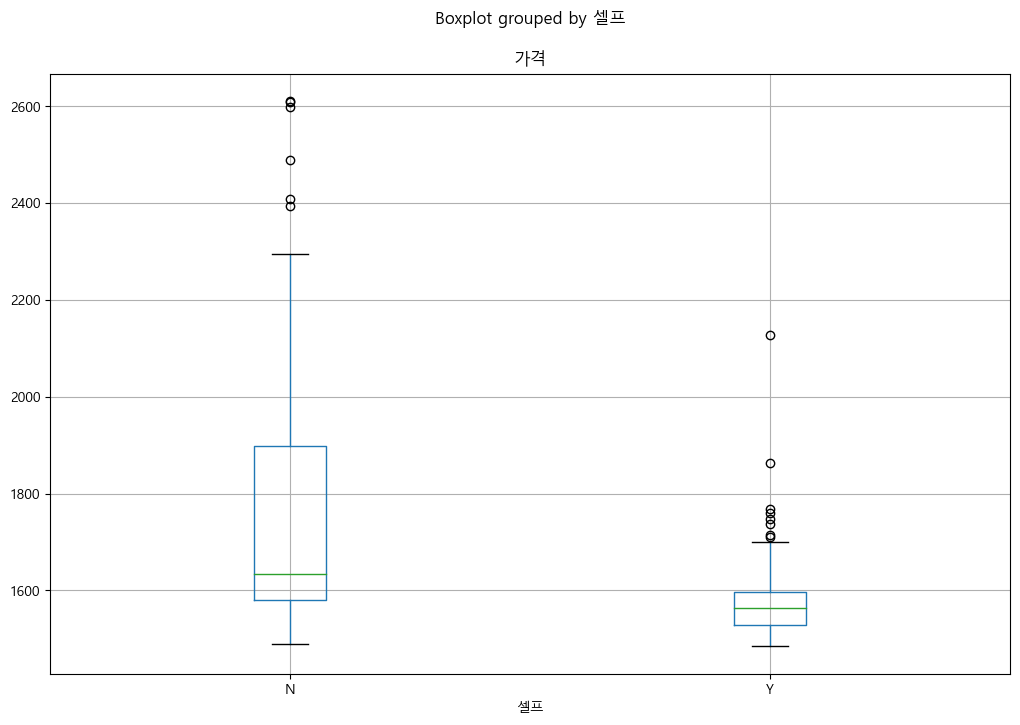

In [104]:
# boxplot(feat. pandas)

station.boxplot(column="가격", by = "셀프", figsize=(12,8))

<Axes: xlabel='셀프', ylabel='가격'>

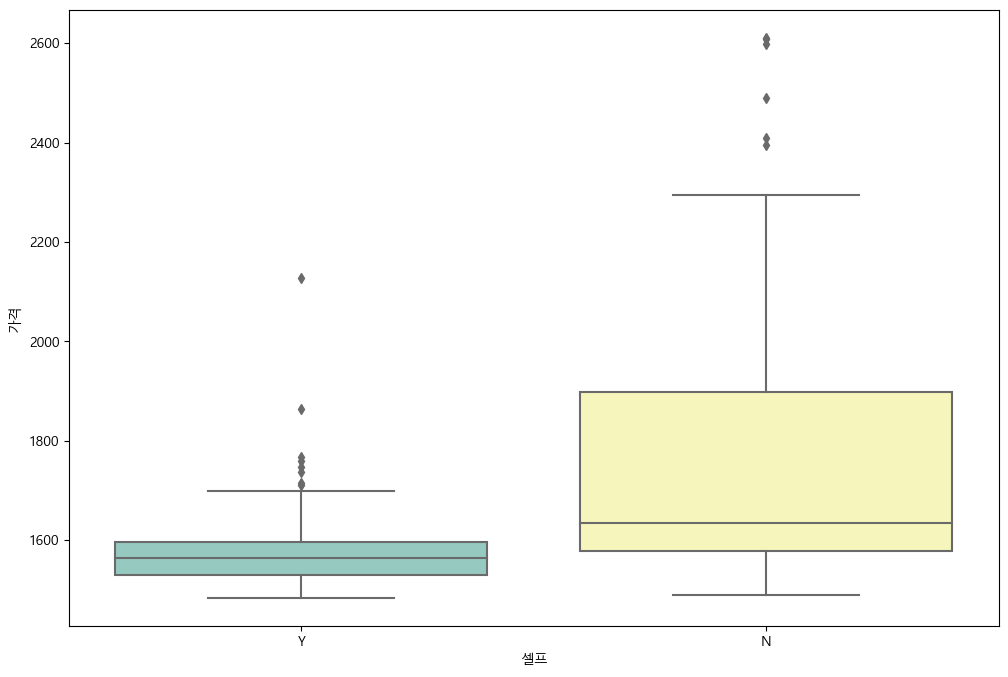

In [103]:
# boxplot(feat. seaborn)


plt.figure(figsize=(12,8))
sns.boxplot(
    x = "셀프" , y = "가격", data = station, palette= "Set3"
)

<Axes: xlabel='상표', ylabel='가격'>

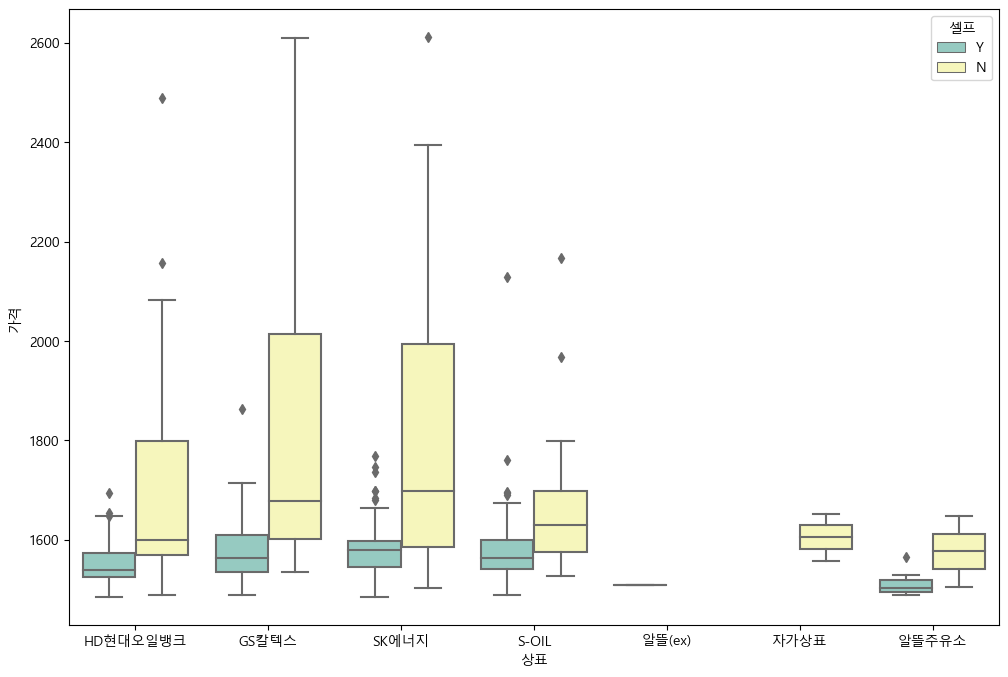

In [105]:
# boxplot(feat. seaborn)


plt.figure(figsize=(12,8))
sns.boxplot(
    x= "상표", y = "가격", hue = "셀프", data=station, palette = "Set3"
)

In [110]:
# 지도시각화

import json
import folium
import numpy as np
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [108]:
# 가장 비싼 주유소 10개


station.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
273,서남주유소,서울 중구 통일로 30,2611.0,N,SK에너지,중구
239,서계주유소,서울 용산구 청파로 367 (청파동),2609.0,N,GS칼텍스,용산구
437,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
436,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2490.0,N,HD현대오일뱅크,강남구
272,필동주유소,서울 중구 퇴계로 196 (필동2가),2409.0,N,GS칼텍스,중구
435,SK논현주유소,서울 강남구 논현로 747 (논현동),2395.0,N,SK에너지,강남구
215,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,2295.0,N,GS칼텍스,영등포구
263,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2290.0,N,GS칼텍스,종로구
262,경복궁주유소,서울 종로구 율곡로 6 (중학동),2280.0,N,GS칼텍스,종로구
261,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2267.0,N,SK에너지,종로구


In [109]:
# 가장 싼 주유소 10개

station.sort_values(by="가격").head(10)

,상호,주소,가격,셀프,상표,구
240,타이거주유소,서울 은평구 수색로 188 (증산동),1484.0,Y,SK에너지,은평구
287,강서오곡셀프주유소,서울 강서구 벌말로 254 (오곡동),1485.0,Y,SK에너지,강서구
241,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1485.0,Y,HD현대오일뱅크,은평구
347,(주)한미석유구로그린주유소,서울 구로구 구로중앙로 76 (구로동),1489.0,Y,GS칼텍스,구로구
197,한경석유(주)경덕주유소,서울 영등포구 여의대방로23길 2 (신길동),1489.0,Y,SK에너지,영등포구
196,(주)강서오일,서울 영등포구 도신로 151,1489.0,Y,HD현대오일뱅크,영등포구
195,(주)MS에너지,서울 영등포구 대림로 230,1489.0,N,HD현대오일뱅크,영등포구
198,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1489.0,Y,SK에너지,영등포구
193,성락주유소,서울 영등포구 가마산로 414 (신길동),1489.0,Y,S-OIL,영등포구
192,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1489.0,Y,GS칼텍스,영등포구


In [111]:
gu_data = pd.pivot_table(
    data=station, index="구", values="가격", aggfunc=np.mean
)

In [125]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path,encoding="utf-8"))

my_map = folium.Map(location=[37.5502,126.982], zoom_start=10, tiles="CartoDB Positron")
folium.Choropleth(
    geo_data = geo_str,
    data = gu_data,
    columns = [gu_data.index, "가격"],
    key_on = "feature.id",
    fill_color = "PuRd"
).add_to(my_map)

my_map